## Contexte

« Prédire le comportement des clients pour les fidéliser. Vous pouvez analyser toutes les données clients pertinentes et développer des programmes de fidélisation ciblés. » [Exemples de données IBM]

## Contenu

Chaque ligne représente un client, chaque colonne contient les attributs du client décrits dans la colonne Métadonnées.

L'ensemble de données comprend des informations sur :

Clients partis au cours du dernier mois – la colonne s'appelle Churn

1.Services auxquels chaque client a souscrit : téléphone, lignes multiples, Internet, sécurité en ligne, sauvegarde en ligne, protection des appareils, support technique et streaming TV et films

2.Informations sur le compte client : durée de la relation client, contrat, mode de paiement, facturation électronique, frais mensuels et frais totaux

3.Informations démographiques sur les clients : sexe, tranche d'âge et s'ils ont des partenaires et des personnes à charge


## Variables et Significations:


customerID : Identifiant unique du client.

gender : Sexe du client (Masculin ou Féminin).

SeniorCitizen : Indique si le client est une personne âgée (1 = Oui, 0 = Non).

Partner : Indique si le client a un(e) partenaire (Oui/Non).

Dependents : Indique si le client a des personnes à charge (Oui/Non).

Tenure : Durée de la relation avec le fournisseur (en mois).

PhoneService : Indique si le client a souscrit à un service téléphonique (Oui/Non).

MultipleLines : Indique si le client a plusieurs lignes téléphoniques (Oui/Non).

InternetService : Type de service Internet souscrit (DSL, Fibre optique, Aucun).

OnlineSecurity : Indique si le client a souscrit à un service de sécurité en ligne (Oui/Non).

OnlineBackup : Indique si le client a souscrit à un service de sauvegarde en ligne (Oui/Non).

DeviceProtection : Indique si le client a souscrit à une protection des appareils (Oui/Non).

TechSupport : Indique si le client a accès à un support technique (Oui/Non).

StreamingTV : Indique si le client a souscrit au service de streaming TV (Oui/Non).

StreamingMovies : Indique si le client a souscrit au service de streaming de films (Oui/Non).

Contract : Type de contrat du client (Mensuel, Un an, Deux ans).

PaperlessBilling : Indique si le client a opté pour une facturation électronique (Oui/Non).

PaymentMethod : Mode de paiement du client (Carte de crédit, Chèque électronique, Chèque envoyé, Prélèvement automatique).

MonthlyCharges : Frais mensuels payés par le client.

TotalCharges : Frais totaux payés par le client jusqu'à présent.

Churn : Indique si le client a résilié son abonnement (Oui/Non).

In [29]:
# Importer les packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [30]:
# Chargement des données
data = pd.read_csv('C:/Users/diaab/Documents/SSD/S2/Projet Python/WA_Fn-UseC_-Telco-Customer-Churn.csv', sep =";")


# Affichage des premières lignes
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
# Informations sur les colonnes (types, valeurs nulles)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:
# Conversion de TotalCharges en float (et gestion des erreurs de conversion)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data = data.dropna(subset=['TotalCharges'])


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [34]:
# Statistiques descriptives (moyenne, écart-type, etc.)
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


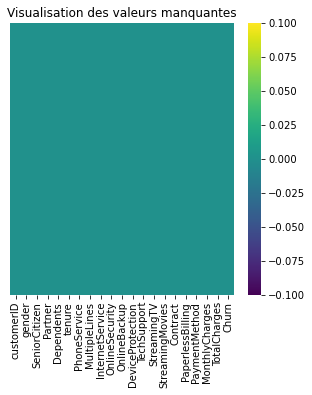

In [35]:
# Vérifier les valeurs manquantes
missing_values = data.isnull()

# Créer une heatmap pour visualiser les valeurs manquantes
plt.figure(figsize=(5, 5))
sns.heatmap(missing_values, cbar=True, cmap='viridis', yticklabels=False)

# Ajouter un titre au graphique
plt.title('Visualisation des valeurs manquantes')
plt.show()

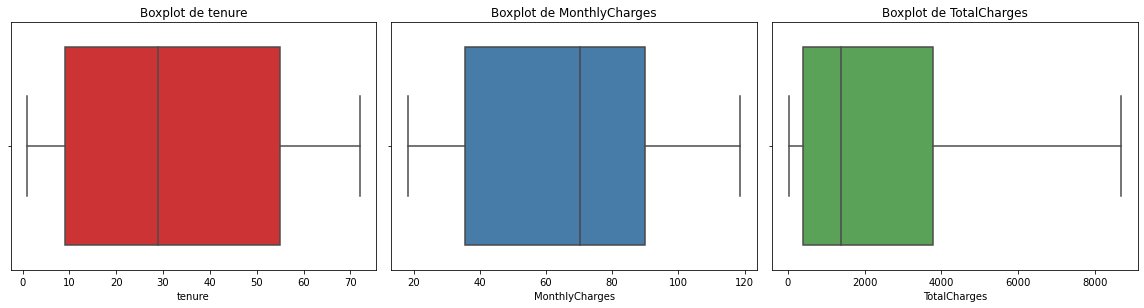

In [36]:
# Colonnes à tracer
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Générer autant de couleurs qu'il y a de colonnes
colors = sns.color_palette('Set1', n_colors=len(columns))

plt.figure(figsize=(16, 12))
for i, (col, color) in enumerate(zip(columns, colors), 1):
    ax = plt.subplot(3, 3, i)          
    sns.boxplot(x=data[col], color=color, ax=ax)
    ax.set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

In [37]:
# Fonction pour détecter les outliers par IQR
def detect_outliers_iqr(data, column):
    # Calcul des quantiles Q1 et Q3
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    # Calcul de l'IQR
    IQR = Q3 - Q1
    
    # Calcul des bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détection des outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return len(outliers)

# Liste des colonnes à vérifier
columns_to_check = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialiser un compteur pour les outliers
total_outliers = 0


# Détection des outliers pour chaque colonne
for column in columns_to_check:
    outliers_count = detect_outliers_iqr(data, column)
    total_outliers += outliers_count
    print(f"Outliers détectés avec IQR pour {column}: {outliers_count} valeurs aberrantes")

# Affichage du nombre total d'outliers détectés
print(f"\nNombre total des outliers détectés : {total_outliers}")

Outliers détectés avec IQR pour tenure: 0 valeurs aberrantes
Outliers détectés avec IQR pour MonthlyCharges: 0 valeurs aberrantes
Outliers détectés avec IQR pour TotalCharges: 0 valeurs aberrantes

Nombre total des outliers détectés : 0


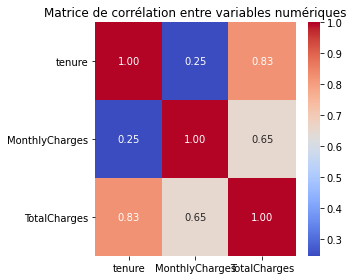

In [38]:
# Sélection des colonnes numériques
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Matrice de corrélation
corr_matrix = data[numeric_features].corr()

# Affichage avec un heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables numériques")
plt.tight_layout()
plt.show()

In [39]:
# Vérification de valeurs nulles
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [40]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
print((data[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']] == 0).sum())

customerID             0
gender                 0
SeniorCitizen       5890
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


In [42]:
# Préparation des données pour le Machine Learning
#Voici les sous-étapes qu’on va suivre, une par une :

#Étape 1 : Séparer les variables numériques et catégorielles

# Variables numériques (déjà connues)
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Variables catégorielles (automatiquement détectées)
cat_features = data.select_dtypes(include='object').columns.tolist()

# On retire la variable cible 'Churn' des features catégorielles
cat_features.remove('Churn')

print("Variables numériques :", num_features)
print("Variables catégorielles :", cat_features)

Variables numériques : ['tenure', 'MonthlyCharges', 'TotalCharges']
Variables catégorielles : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [43]:
#Étape 2 : Encodage de la variable cible Churn

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [44]:
#Étape 3 : One-Hot Encoding des variables catégorielles

data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

# Cette ligne fait 3 choses :

#pd.get_dummies() applique le One-Hot Encoding (chaque catégorie devient une colonne binaire).

#columns=cat_features applique cet encodage uniquement sur les colonnes catégorielles.

#drop_first=True supprime la première catégorie de chaque variable pour éviter les doublons d’information (multicolinéarité).

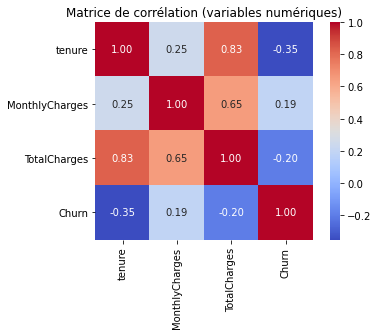

In [45]:
# Calcul de la matrice de corrélation pour les variables numériques avec churn
corr_matrix = data_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()

# Affichage de la heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

In [46]:
# Séparation du jeu de données : X (features) et y (cible) 

# Cible (variable à prédire)
y = data_encoded['Churn']

# Variables explicatives : toutes les colonnes sauf 'Churn'
X = data_encoded.drop('Churn', axis=1)

In [47]:

# Normalisation des variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Découpage en jeu d’entraînement et jeu de test


# 80 % pour l'entraînement, 20 % pour le test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
#Selection des paramètres du modèle
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10],          # inverse de la régularisation
    'solver': ['lbfgs','liblinear', 'saga'],  # solvers compatibles avec l1 et elasticnet
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced'],
    'random_state': ['auto', 'ovr', 'multinomial'],
    'l1_ratio': [0.0, 0.5, 1.0],
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5          # 5-fold cross-validation
                           )
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure accuracy en cross-validation :", grid_search.best_score_)

In [ ]:
# Création du modèle
log_model = LogisticRegression(
    penalty='l2',           # régularisation L2 par défaut (on peut tester l1, elasticnet)
    C=0.01,                  # force de régularisation (on peut tester 0.01, 0.1, 1, 10)
    solver='saga',         # bon pour petits/moyens datasets
    max_iter=100,           # nombre d'itérations pour s'assurer que ça converge
    #class_weight='balanced', # utile si classes déséquilibrées
    random_state=26,        # pour reproductibilité
    multi_class='auto',     # gère auto binaire/multiclasse
    l1_ratio=0.0           # à utiliser si penalty='elasticnet'
)

# Entraînement
log_model.fit(X_train, y_train)


In [24]:
print("X_train shape :", X_train.shape)
print("X_test shape  :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape  :", y_test.shape)

X_train shape : (5625, 7061)
X_test shape  : (1407, 7061)
y_train shape : (5625,)
y_test shape  : (1407,)


In [ ]:
# Prédictions
y_pred = log_model.predict(X_test)

In [ ]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

# Affichage graphique
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm, cmap=plt.cm.Blues)

# Annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

# Étiquettes
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Non-Churn', 'Churn'])
ax.set_yticklabels(['Non-Churn', 'Churn'])
ax.set_xlabel('Prédiction')
ax.set_ylabel('Valeur réelle')
ax.set_title('Matrice de Confusion - Régression Logistique')
plt.colorbar(im)
plt.tight_layout()
plt.show()

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

In [ ]:
# Rapport de classification
print("Rapport de classification:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilités prédites pour la classe positive
y_proba = log_model.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Affichage
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.grid()
plt.show()